In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-series-forecasting-with-yahoo-stock-price/yahoo_stock.csv


Time Series Forecasting with Yahoo Stock Price


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import tensorflow as tf

2025-05-14 15:51:03.907128: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747237864.155094      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747237864.227595      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
data = pd.read_csv("/kaggle/input/time-series-forecasting-with-yahoo-stock-price/yahoo_stock.csv")

In [6]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [7]:
data.shape

(1825, 7)

In [8]:
data.info

<bound method DataFrame.info of             Date         High          Low         Open        Close  \
0     2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1     2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2     2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3     2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4     2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   
...          ...          ...          ...          ...          ...   
1820  2020-11-16  3628.510010  3600.159912  3600.159912  3626.909912   
1821  2020-11-17  3623.110107  3588.679932  3610.310059  3609.530029   
1822  2020-11-18  3619.090088  3567.330078  3612.090088  3567.790039   
1823  2020-11-19  3585.219971  3543.840088  3559.409912  3581.870117   
1824  2020-11-20  3581.229980  3556.850098  3579.310059  3557.540039   

            Volume    Adj Close  
0     3.587980e+09  2086.590088  
1     3.884930e+09  2089.139893  
2

In [9]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


In [10]:
data.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [11]:
data["Date"] = pd.to_datetime(data["Date"])
data.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [13]:
import plotly.express as px

# Βασικό γράφημα γραμμής
fig = px.line(
    data, 
    x="Date", 
    y="Close", 
    title="📈 Κλείσιμο Τιμής με την Πάροδο του Χρόνου",
    labels={"Close": "Τιμή Κλεισίματος", "Date": "Ημερομηνία"},
)

# Προσαρμογή εμφάνισης
fig.update_traces(
    line=dict(color="mediumvioletred", width=3),
    hovertemplate='Ημερομηνία: %{x}<br>Τιμή: %{y:.2f} €<extra></extra>',
    mode='lines+markers',
    marker=dict(size=4)
)

# Προσαρμογή Layout
fig.update_layout(
    width=900,
    height=450,
    plot_bgcolor='rgba(250, 250, 250, 0.95)',
    paper_bgcolor='white',
    font=dict(family="Verdana", size=14),
    title_font=dict(size=20, family="Verdana", color='darkblue'),
    xaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        title='Ημερομηνία'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        title='Τιμή Κλεισίματος (€)'
    )
)

# Εμφάνιση διαγράμματος
fig.show()


In [14]:
import plotly.express as px

# Δημιουργία γραφήματος για τον όγκο συναλλαγών
fig = px.line(
    data,
    x="Date",
    y="Volume",
    title=" Όγκος Συναλλαγών με την Πάροδο του Χρόνου",
    labels={"Date": "Ημερομηνία", "Volume": "Όγκος Συναλλαγών"}
)

# Προσαρμογή γραμμής και markers
fig.update_traces(
    line=dict(color="darkorange", width=3),
    mode="lines+markers",
    marker=dict(size=4),
    hovertemplate="Ημερομηνία: %{x}<br>Όγκος: %{y}<extra></extra>"
)

# Προσαρμογή φόντου, γραμματοσειρών και αξόνων
fig.update_layout(
    width=900,
    height=450,
    plot_bgcolor='rgba(255, 255, 255, 0.95)',
    paper_bgcolor='white',
    font=dict(family="Verdana", size=13),
    title_font=dict(size=20, family="Verdana", color='darkred'),
    xaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        title='Ημερομηνία'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        title='Όγκος Συναλλαγών'
    )
)

# Εμφάνιση του διαγράμματος
fig.show()


/tmp/ipykernel_35/152865443.py:16: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.



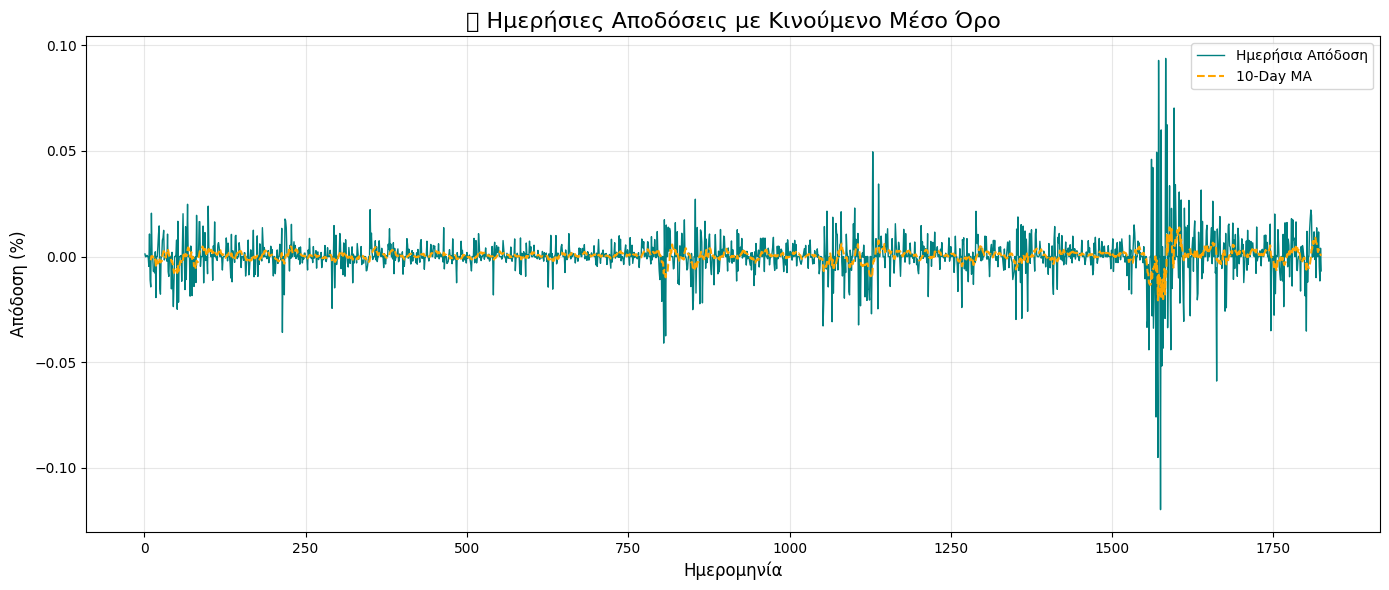

In [15]:
import matplotlib.pyplot as plt

# Υπολογισμός ημερήσιων αποδόσεων
data["Daily Return"] = data["Close"].pct_change()

# Δημιουργία σχήματος
plt.figure(figsize=(14, 6))
plt.plot(data["Daily Return"], label="Ημερήσια Απόδοση", color='teal', linewidth=1)
plt.plot(data["Daily Return"].rolling(10).mean(), label="10-Day MA", color='orange', linestyle='--')

plt.title("📉 Ημερήσιες Αποδόσεις με Κινούμενο Μέσο Όρο", fontsize=16)
plt.xlabel("Ημερομηνία", fontsize=12)
plt.ylabel("Απόδοση (%)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/tmp/ipykernel_35/2841825911.py:20: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



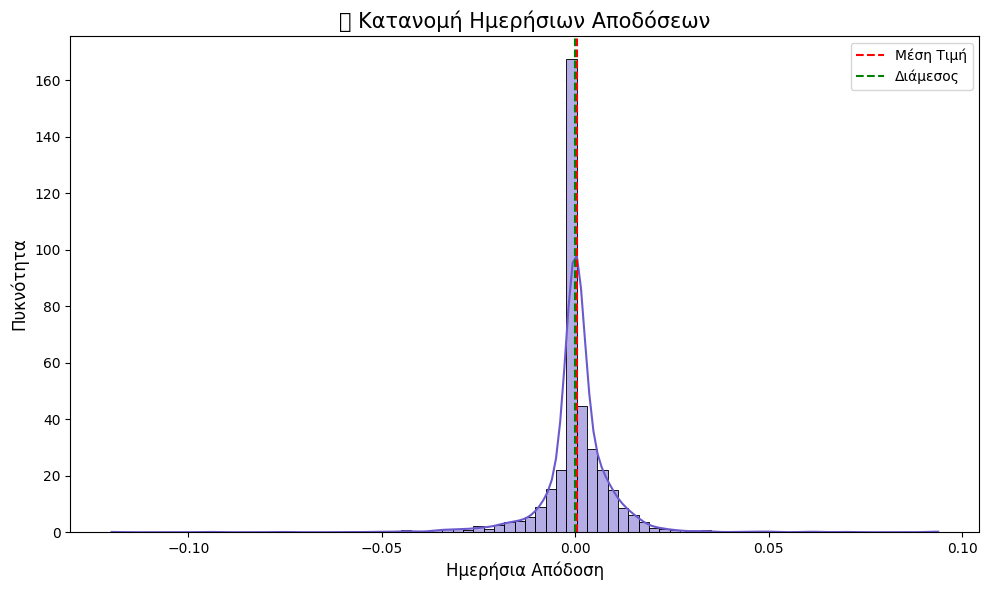

In [16]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(
    data['Daily Return'].dropna(),
    bins=80,
    kde=True,
    color='slateblue',
    edgecolor='black',
    stat="density"
)

plt.axvline(data['Daily Return'].mean(), color='red', linestyle='--', label='Μέση Τιμή')
plt.axvline(data['Daily Return'].median(), color='green', linestyle='--', label='Διάμεσος')

plt.title("📊 Κατανομή Ημερήσιων Αποδόσεων", fontsize=15)
plt.xlabel("Ημερήσια Απόδοση", fontsize=12)
plt.ylabel("Πυκνότητα", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


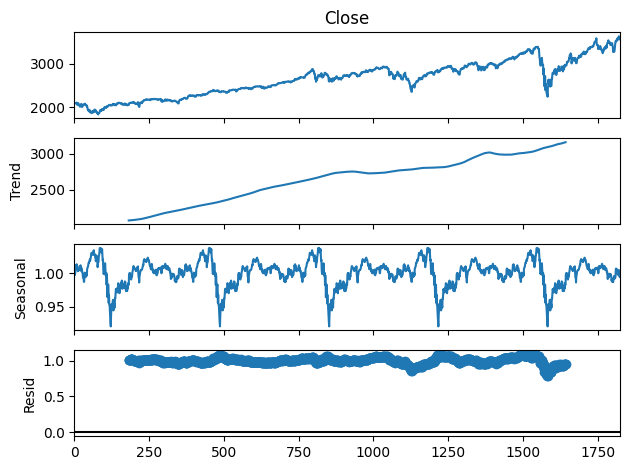

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data["Close"],model="multiplicative",period=365)
result.plot()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less

/tmp/ipykernel_35/3783813143.py:25: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from current font.



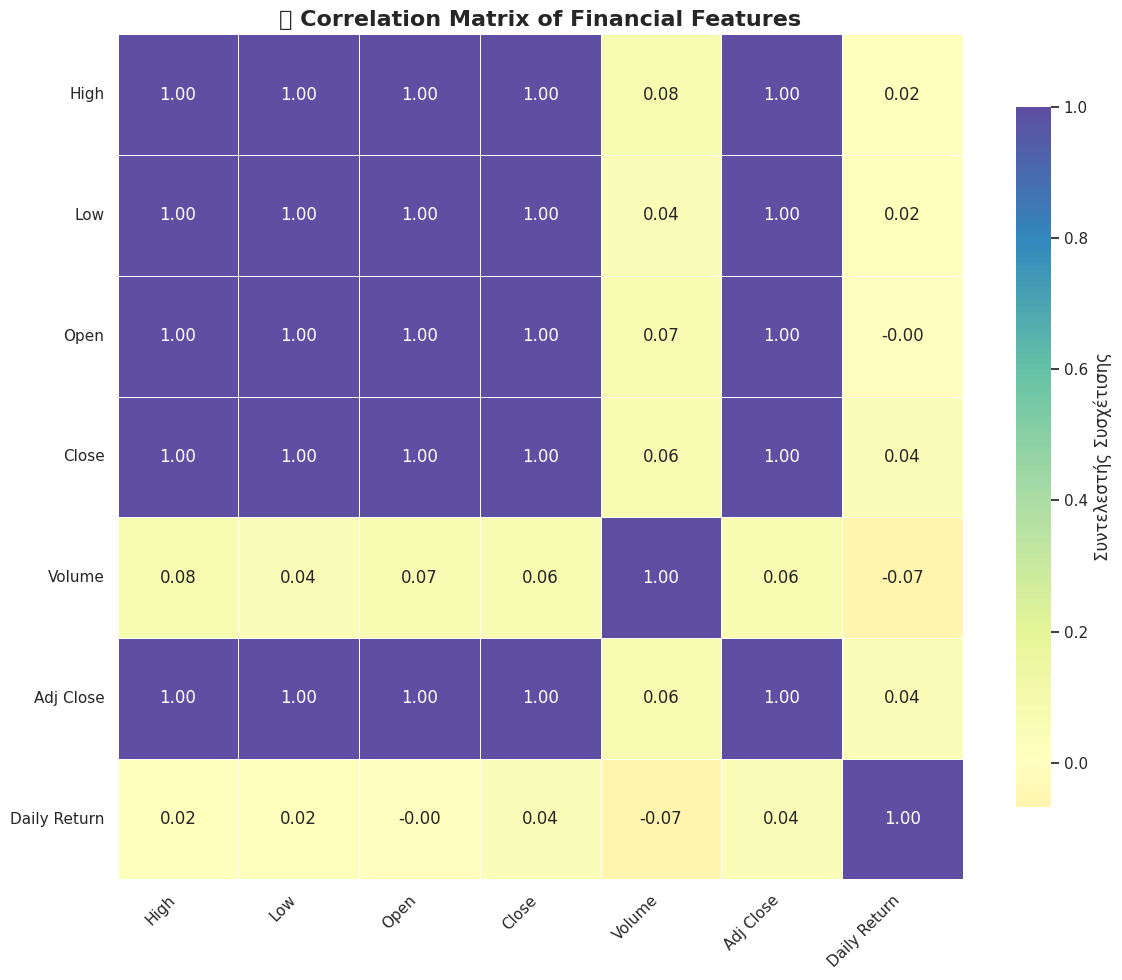

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Υπολογισμός πίνακα συσχέτισης
corr_matrix = data.corr(numeric_only=True)

# Δημιουργία διαγράμματος
plt.figure(figsize=(12, 10))
sns.set(style="white")  # καθαρό background

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="Spectral",  # εναλλακτικά: "coolwarm", "viridis", "crest"
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Συντελεστής Συσχέτισης"}
)

plt.title("🔗 Correlation Matrix of Financial Features", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()


In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Επιλογή μόνο της στήλης 'Close'
close_data = data[["Close"]].values  # Εξαγωγή ως NumPy array

# Κανονικοποίηση τιμών στο διάστημα [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

# Συνάρτηση δημιουργίας ακολουθιών για LSTM
def create_sequences(data: np.ndarray, sequence_length: int):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Ορισμός μήκους ακολουθίας (π.χ. 50 ημερών)
sequence_length = 50

# Δημιουργία χαρακτηριστικών (X) και ετικετών (y)
X, y = create_sequences(scaled_data, sequence_length)

# Διαχωρισμός σε σύνολα εκπαίδευσης και δοκιμής (80/20 split)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Προβολή διαστάσεων για επιβεβαίωση
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (1420, 50, 1)
y_train shape: (1420, 1)


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Δημιουργία του LSTM μοντέλου
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Σύνταξη μοντέλου
model.compile(optimizer='adam', loss='mean_squared_error')

# Περίληψη αρχιτεκτονικής
model.summary()


2025-05-14 16:00:45.115333: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Εκπαίδευση μοντέλου
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0451 - val_loss: 0.0117
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0030 - val_loss: 0.0043
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0023 - val_loss: 0.0044
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0020 - val_loss: 0.0040
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0021 - val_loss: 0.0049
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0023 - val_loss: 0.0045
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0019 - val_loss: 0.0043
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0015 - val_loss: 0.0037
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.



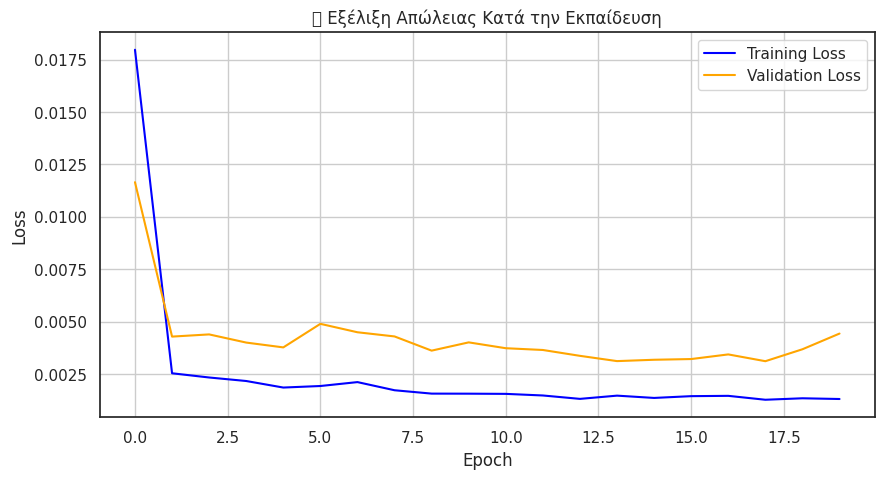

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('📉 Εξέλιξη Απώλειας Κατά την Εκπαίδευση')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.



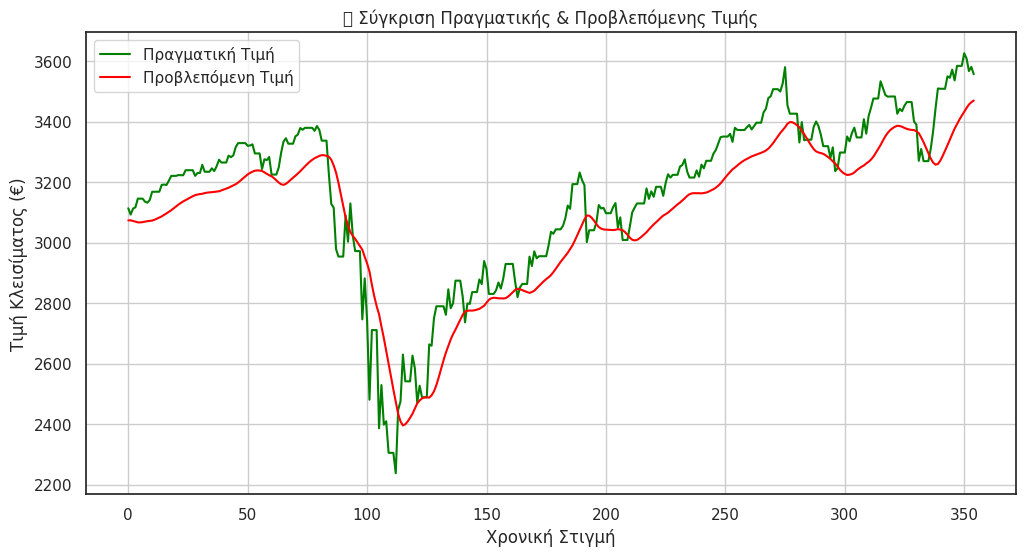

In [23]:
# Πρόβλεψη σε test set
predicted_scaled = model.predict(X_test)

# Αντιστροφή κανονικοποίησης
predicted_prices = scaler.inverse_transform(predicted_scaled)
actual_prices = scaler.inverse_transform(y_test)

# Οπτικοποίηση αποτελεσμάτων
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Πραγματική Τιμή', color='green')
plt.plot(predicted_prices, label='Προβλεπόμενη Τιμή', color='red')
plt.title('📈 Σύγκριση Πραγματικής & Προβλεπόμενης Τιμής')
plt.xlabel('Χρονική Στιγμή')
plt.ylabel('Τιμή Κλεισίματος (€)')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Υπολογισμός σφαλμάτων
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)

print(f" Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f" Mean Absolute Error (MAE): {mae:.4f}")


 Root Mean Squared Error (RMSE): 119.7970
 Mean Absolute Error (MAE): 102.3628


In [26]:
model.save("lstm_close_price_model.h5")
print(" Το μοντέλο αποθηκεύτηκε ως 'lstm_close_price_model.h5'")


 Το μοντέλο αποθηκεύτηκε ως 'lstm_close_price_model.h5'


In [27]:
def predict_next_days(model, last_sequence, n_days):
    predictions = []
    current_input = last_sequence.copy()
    
    for _ in range(n_days):
        pred = model.predict(current_input[np.newaxis, :, :])[0]
        predictions.append(pred)
        
        # Ενημέρωση εισόδου με την πρόβλεψη
        current_input = np.vstack([current_input[1:], pred])
    
    return scaler.inverse_transform(predictions)

# Παράδειγμα πρόβλεψης 10 ημερών
last_sequence = X_test[-1]  # τελευταία διαθέσιμη ακολουθία
future_predictions = predict_next_days(model, last_sequence, n_days=10)

# Εμφάνιση προβλέψεων
print("📅 Προβλεπόμενες Τιμές για τις Επόμενες 10 Ημέρες:")
print(future_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
📅 Προβλεπόμενες Τιμές για τις Επόμενες 10 Ημέρες:
[3470.38230895 3467.91057909 3460.66470075 3450.54074557 3438.7363227
 3425.99040071 3412.7498327  3399.28808849 3385.7671925  3372.28530239]
